In [56]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [57]:
def create_gauss_filter(h, w, k_size, sigma):

    filt = np.zeros((h, w))

    cx, cy = h//2, w//2

    for i in range(h):
        for j in range(w):
            dist = np.sqrt((i-cx)**2 + (j-cy)**2)
            filt[i,j] = np.exp(-dist**2 / (2*sigma**2))

    filt /= np.sum(filt)

    if k_size > h:
        filt = cv2.resize(filt, (k_size, k_size), interpolation=cv2.INTER_CUBIC)
        filt /= np.sum(filt)

    filt_fft = np.fft.fft2(filt)

    return filt, filt_fft


In [58]:
def apply_kernel_espectral(gray_image, filt_fft):
    filtered_image_fft = np.fft.ifft2(np.fft.fft2(gray_image) * filt_fft)
    filtered_image = np.fft.ifftshift(np.real(filtered_image_fft))
    return filtered_image

In [59]:
def apply_and_plot_kernel_espectral(gray_image, filt_fft):
    filtered_image_fft = np.fft.ifft2(np.fft.fft2(gray_image) * filt_fft)
    filtered_image = np.fft.ifftshift(np.real(filtered_image_fft))
    plt.subplot(1, 2, 1)
    plt.title('Espectral')
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.show()
    return filtered_image

In [60]:
def apply_kernel_convolucion(gray_image, filt):
    filtered_image = cv2.filter2D(gray_image, -1, filt)
    return filtered_image

In [61]:
def apply_and_plot_kernel_convolucion(gray_image, filt):
    filtered_image = cv2.filter2D(gray_image, -1, filt)
    plt.subplot(1, 2, 1)
    plt.title('Convolucion')
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.show()
    return filtered_image

In [62]:
def plot_kernel(h, w, k_size, sigma):
    kernel, fourier = create_gauss_filter(h, w, k_size, sigma)
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(kernel, cmap='jet')
    plt.subplot(1, 2, 2)
    plt.imshow(np.abs(fourier), cmap='jet')
    plt.show()

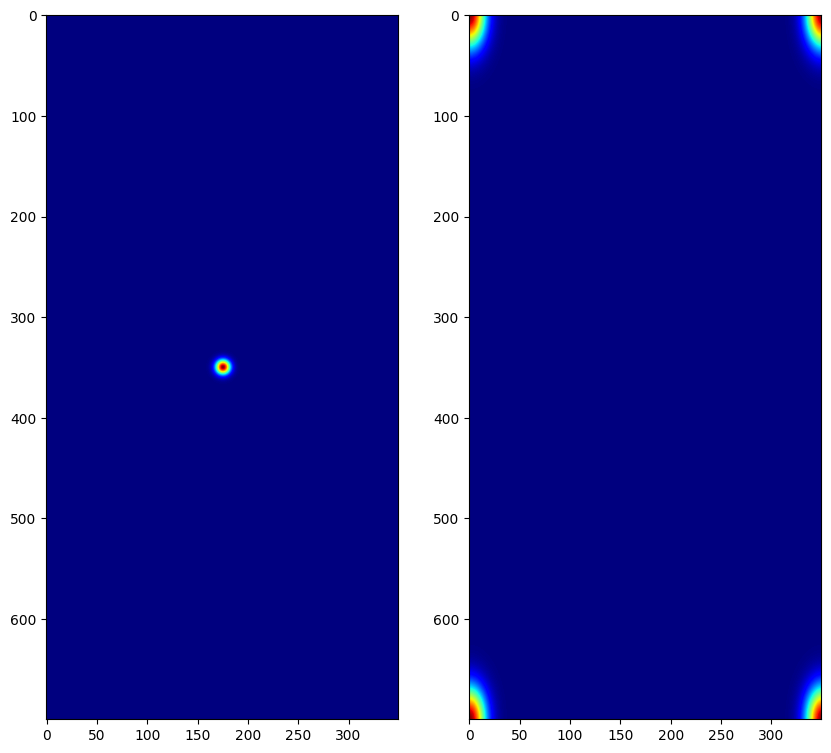

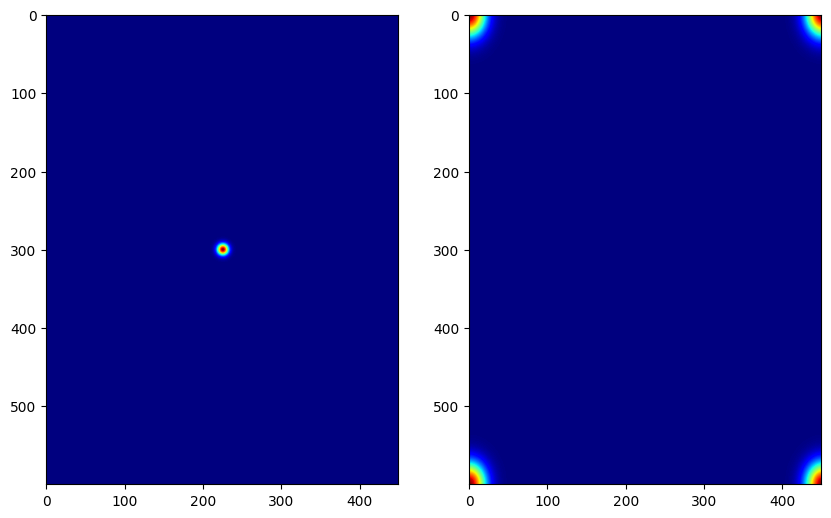

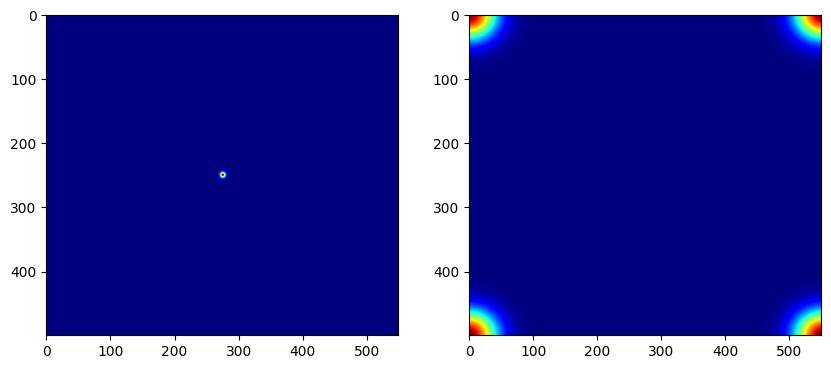

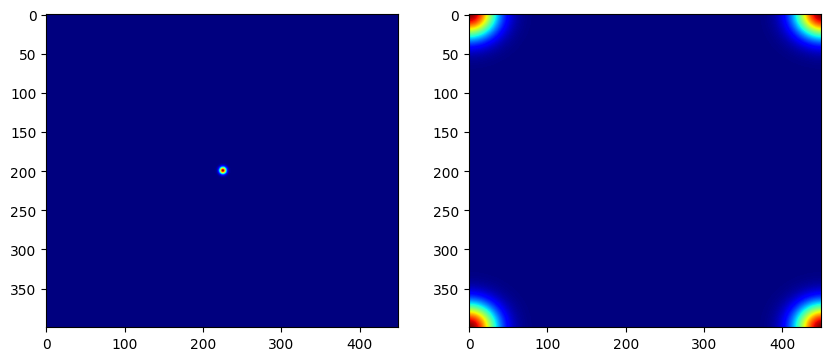

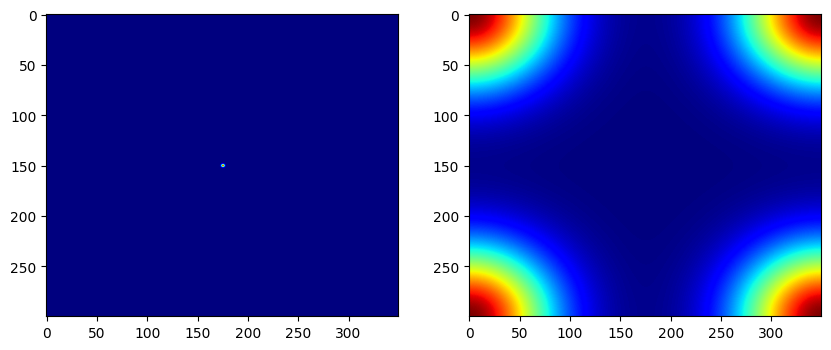

In [63]:
plot_kernel(700, 350, 7, 5)
plot_kernel(600, 450, 5, 5)
plot_kernel(500, 550, 5, 3)
plot_kernel(400, 450, 3, 3)
plot_kernel(300, 350, 3, 1)

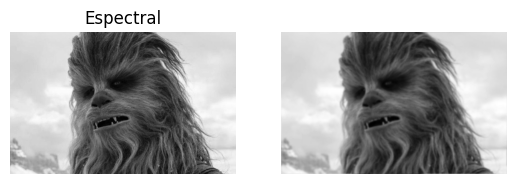

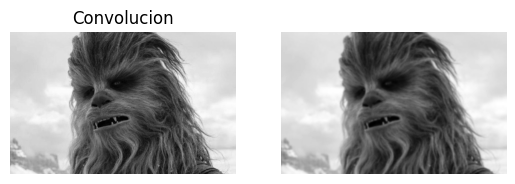

In [64]:
image_path = 'chewbacca.jpg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

k_size = 7
sigma = 3
h, w = gray_image.shape
gauss_filt, gauss_filt_fft = create_gauss_filter(h, w, k_size, sigma)
espectral = apply_and_plot_kernel_espectral(gray_image, gauss_filt_fft)
convolucion = apply_and_plot_kernel_convolucion(gray_image, gauss_filt)

In [65]:
def sharpness_measure(gray_image):

    fft = np.fft.fft2(gray_image)

    magnitude = np.abs(fft)

    mean = np.mean(magnitude)
    std_dev = np.std(magnitude)

    sharpness = std_dev / mean

    return sharpness

In [67]:
for k_size in [2,3,4,5,6,7]:
    for sigma in [1,2,3,4]:
        gauss_filt, gauss_filt_fft = create_gauss_filter(h, w, k_size, sigma)
        espectral = apply_kernel_espectral(gray_image, gauss_filt_fft)
        convolucion = apply_kernel_convolucion(gray_image, gauss_filt)
        print(f'k_size {str(k_size)} sigma {str(sigma)} convolucion {str(sharpness_measure(convolucion))} espectral {str(sharpness_measure(espectral))}')

k_size 2 sigma 1 convolucion 39.00570712777235 espectral 42.84194225353503
k_size 2 sigma 2 convolucion 51.83856511061126 espectral 62.73126745049847
k_size 2 sigma 3 convolucion 61.74666155380654 espectral 80.65226760361921
k_size 2 sigma 4 convolucion 69.39011276615942 espectral 96.51100420552376
k_size 3 sigma 1 convolucion 39.00570712777235 espectral 42.84194225353503
k_size 3 sigma 2 convolucion 51.83856511061126 espectral 62.73126745049847
k_size 3 sigma 3 convolucion 61.74666155380654 espectral 80.65226760361921
k_size 3 sigma 4 convolucion 69.39011276615942 espectral 96.51100420552376
k_size 4 sigma 1 convolucion 39.00570712777235 espectral 42.84194225353503
k_size 4 sigma 2 convolucion 51.83856511061126 espectral 62.73126745049847
k_size 4 sigma 3 convolucion 61.74666155380654 espectral 80.65226760361921
k_size 4 sigma 4 convolucion 69.39011276615942 espectral 96.51100420552376
k_size 5 sigma 1 convolucion 39.00570712777235 espectral 42.84194225353503
k_size 5 sigma 2 convoluc

In [68]:
# Tenengrad (GRA6)
def teng_measure(gray_image):
    gaussianX = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0)
    gaussianY = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0)
    return np.mean(gaussianX * gaussianX +
                      gaussianY * gaussianY)

In [ ]:
for k_size in [2,3,4,5,6,7]:
    for sigma in [1,2,3,4]:
        gauss_filt, gauss_filt_fft = create_gauss_filter(h, w, k_size, sigma)
        espectral = apply_kernel_espectral(gray_image, gauss_filt_fft)
        convolucion = apply_kernel_convolucion(gray_image, gauss_filt)
        print(f'k_size {str(k_size)} sigma {str(sigma)} convolucion {str(teng_measure(convolucion))} espectral {str(teng_measure(espectral))}')

k_size 2 sigma 1 convolucion 1625.786455026455 espectral 1626.0381515092702
k_size 2 sigma 2 convolucion 798.3280555555556 espectral 800.7628043162961
k_size 2 sigma 3 convolucion 477.9291468253968 espectral 479.6942499020454
k_size 2 sigma 4 convolucion 327.3058509700176 espectral 328.34265351429445
k_size 3 sigma 1 convolucion 1625.786455026455 espectral 1626.0381515092702
k_size 3 sigma 2 convolucion 798.3280555555556 espectral 800.7628043162961
k_size 3 sigma 3 convolucion 477.9291468253968 espectral 479.6942499020454
